<a href="https://colab.research.google.com/github/Z4UC/Controller/blob/main/PID_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Zaman: 0.00s | Açı: -0.00° | Sağ Ağırlık: 35.00kg
Zaman: 0.01s | Açı: -0.01° | Sağ Ağırlık: 35.00kg
Zaman: 0.02s | Açı: -0.03° | Sağ Ağırlık: 34.74kg
Zaman: 0.03s | Açı: -0.04° | Sağ Ağırlık: 34.49kg
Zaman: 0.04s | Açı: -0.06° | Sağ Ağırlık: 34.15kg
Zaman: 0.05s | Açı: -0.09° | Sağ Ağırlık: 33.75kg
Zaman: 0.06s | Açı: -0.11° | Sağ Ağırlık: 33.27kg
Zaman: 0.07s | Açı: -0.14° | Sağ Ağırlık: 32.75kg
Zaman: 0.08s | Açı: -0.17° | Sağ Ağırlık: 32.17kg
Zaman: 0.09s | Açı: -0.20° | Sağ Ağırlık: 31.55kg
Zaman: 0.10s | Açı: -0.24° | Sağ Ağırlık: 30.90kg
Zaman: 0.11s | Açı: -0.27° | Sağ Ağırlık: 30.24kg
Zaman: 0.12s | Açı: -0.30° | Sağ Ağırlık: 29.58kg
Zaman: 0.13s | Açı: -0.34° | Sağ Ağırlık: 28.92kg
Zaman: 0.14s | Açı: -0.37° | Sağ Ağırlık: 28.28kg
Zaman: 0.15s | Açı: -0.39° | Sağ Ağırlık: 27.68kg
Zaman: 0.16s | Açı: -0.42° | Sağ Ağırlık: 27.12kg
Zaman: 0.17s | Açı: -0.44° | Sağ Ağırlık: 26.62kg
Zaman: 0.18s | Açı: -0.46° | Sağ Ağırlık: 26.19kg
Zaman: 0.19s | Açı: -0.47° | Sağ Ağırlık: 25.83kg


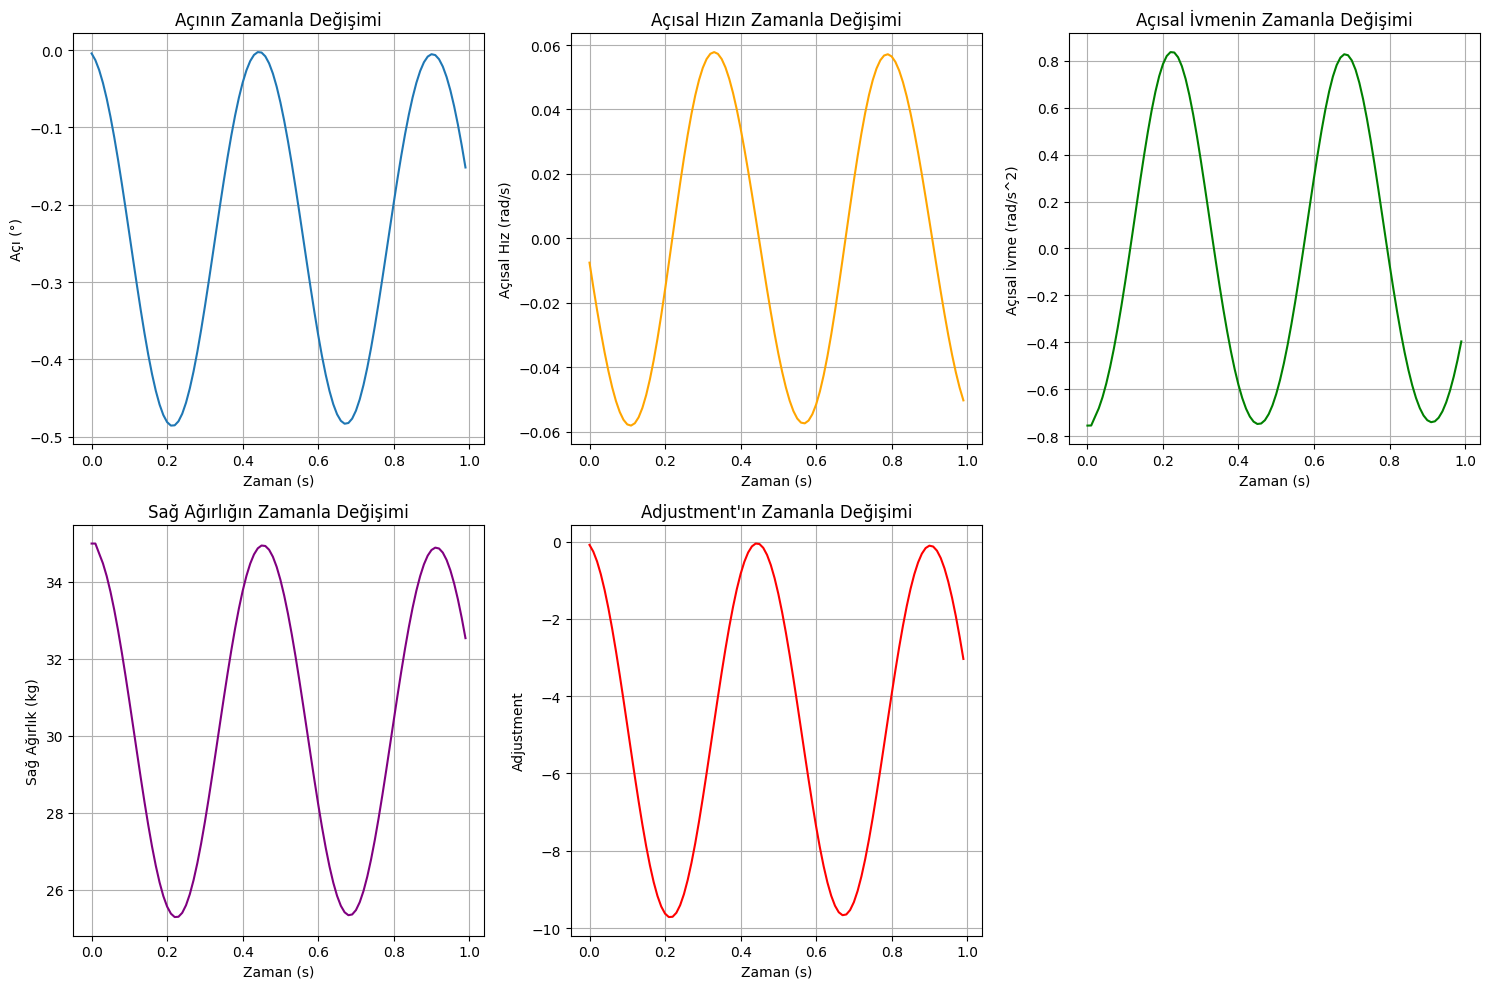

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Sabit parametreler
g = 9.81  # Yerçekimi ivmesi (m/s^2)
length = 2.0  # Tahtravallinin uzunluğu (m)
pivot = length / 2  # Denge noktası
friction = 0.05  # Sürtünme katsayısı
err_arr = []
adj_arr = []
weights_right = []  # Sağ ağırlıkların kaydedileceği liste


in_right_weight = 0
first_weight_counter = 0

def calculate_torque(weight_left, weight_right, length_left, length_right):
    """
    Kuvvet momentlerini hesaplar.
    """
    torque_left = weight_left * g * length_left
    torque_right = weight_right * g * length_right
    return torque_left - torque_right

def weight_pid(angle, weight_right):
    global err_arr, adj_arr,first_weight_counter, in_right_weight


    if first_weight_counter < 1:
        in_right_weight = weight_right
        first_weight_counter += 1




    """
    PID denetleyici fonksiyonu. Açıyı dengelemek için sağ ağırlığı ayarlar.
    """
    # PID parametreleri
    Kp = 20  # Proportional gain
    Ki = 5  # Integral gain
    Kd = 10  # Derivative gain

    # Hata hesaplama
    target_angle = 0  # Hedef açı (denge durumu)
    error = angle - target_angle
    err_arr.append(error)
    x = len(err_arr) - 1

    # PID hesaplamaları
    adjustment = Kp * error  # Proportional kontrol

    # Integral kontrol
   ### integral_error = sum(err_arr)  # Integral bileşeni, hata birikimi
    ###adjustment += Ki * integral_error  # Integral bileşeni ekle
###
    # Derivative kontrol
    ###if x > 0:  # Derivative hesaplaması için yeterli veri olmalı
        ###derivative_error = err_arr[x] - err_arr[x-1]  # Türev (hata farkı)
        ###adjustment += Kd * derivative_error  # Derivative bileşeni ekle

    adj_arr.append(adjustment)

    if x > 0:
        #if err_arr[x] - err_arr[x-1] < 0 and error < 0:
            #print("1")
        weight_right = in_right_weight + adjustment
       ## elif err_arr[x] - err_arr[x-1] < 0 and error > 0:
           ## print("2")
           ## weight_right = in_right_weight - adjustment
      ##  elif err_arr[x] - err_arr[x-1] > 0 and error > 0:
           ## print("3")
           ## weight_right = in_right_weight + adjustment
       ## elif err_arr[x] - err_arr[x-1] > 0 and error < 0:
           ## print("4")
            ##weight_right = in_right_weight - adjustment

    # Sağ ağırlığın minimum sınırını belirleme
    if weight_right < 0:
        weight_right = 0

    return weight_right

def simulate_seesaw(weight_left, weight_right_initial, time_step=0.01, duration=10):
    """
    Tahtravalli simülasyonu.
    """
    angle = 0  # Başlangıç açısı (radyan)
    angular_velocity = 0  # Açısal hız (radyan/s)

    weight_right = weight_right_initial
    length_left = pivot  # Sol tarafın uzunluğu sabit
    length_right = pivot  # Sağ tarafın uzunluğu sabit

    times = np.arange(0, duration, time_step)

    # Grafikleri çizmek için veriler
    angles = []
    angular_velocities = []
    angular_accelerations = []

    for t in times:
        torque = calculate_torque(weight_left, weight_right, length_left, length_right)
        angular_acceleration = torque / (weight_left + weight_right)  # Basit bir kütle momenti modeli

        # Sürtünme etkisi
        angular_acceleration -= friction * angular_velocity

        # Hareket denklemleri
        angular_velocity += angular_acceleration * time_step
        angle += angular_velocity * time_step

        # Açıyı sınırlandır (-45° ile +45° arasında)
        if angle > np.radians(45):
            angle = np.radians(45)
            angular_velocity = 0
        elif angle < np.radians(-45):
            angle = np.radians(-45)
            angular_velocity = 0

        # Verileri kaydet
        angles.append(angle)
        angular_velocities.append(angular_velocity)
        angular_accelerations.append(angular_acceleration)
        weights_right.append(weight_right)  # Sağ ağırlığı kaydet

        # Açıyı ve sürtünmeden dolayı yavaşlamayı konsola yazdır
        print(f"Zaman: {t:.2f}s | Açı: {np.degrees(angle):.2f}° | Sağ Ağırlık: {weight_right:.2f}kg")

        # Sağ ağırlığını kontrol etme
        if abs(np.degrees(angle)) != 0:
            weight_right = weight_pid(np.degrees(angle), weight_right)

        # Hata uzunluğu 100 olduğunda simülasyonu durdur
        if len(err_arr) >= 100:
            break

        # Simülasyonu yavaşlatmak için bekleme
        time.sleep(0.1)

    # Grafik çizimi
    plt.figure(figsize=(15, 10))

    plt.subplot(2, 3, 1)
    plt.plot(times[:len(angles)], np.degrees(angles), label="Açı (°)")
    plt.xlabel("Zaman (s)")
    plt.ylabel("Açı (°)")
    plt.title("Açının Zamanla Değişimi")
    plt.grid()

    plt.subplot(2, 3, 2)
    plt.plot(times[:len(angular_velocities)], angular_velocities, label="Açısal Hız (rad/s)", color="orange")
    plt.xlabel("Zaman (s)")
    plt.ylabel("Açısal Hız (rad/s)")
    plt.title("Açısal Hızın Zamanla Değişimi")
    plt.grid()

    plt.subplot(2, 3, 3)
    plt.plot(times[:len(angular_accelerations)], angular_accelerations, label="Açısal İvme (rad/s^2)", color="green")
    plt.xlabel("Zaman (s)")
    plt.ylabel("Açısal İvme (rad/s^2)")
    plt.title("Açısal İvmenin Zamanla Değişimi")
    plt.grid()

    plt.subplot(2, 3, 4)
    plt.plot(times[:len(weights_right)], weights_right, label="Sağ Ağırlık (kg)", color="purple")
    plt.xlabel("Zaman (s)")
    plt.ylabel("Sağ Ağırlık (kg)")
    plt.title("Sağ Ağırlığın Zamanla Değişimi")
    plt.grid()

    plt.subplot(2, 3, 5)
    plt.plot(times[:len(adj_arr)], adj_arr, label="Adjustment", color="red")
    plt.xlabel("Zaman (s)")
    plt.ylabel("Adjustment")
    plt.title("Adjustment'ın Zamanla Değişimi")
    plt.grid()

    plt.tight_layout()
    plt.show()

# Başlangıç değerleri
weight_left = 30  # Sol ağırlık (kg)
weight_right_initial = 35  # Sağ ağırlık başlangıcı (kg)

simulate_seesaw(weight_left, weight_right_initial)
